# CONCEPT
1. Read dataset folder
2. Preprocessing dataset function
3. Save preprocessing dataset
4. Create dataset.csv
5. Split dataset -> Save

Explain label:
    '+' -> 10 ;
    '-' -> 11 ;
    '*' -> 12 ;
    ':' -> 13 ;
    '=' -> 14 ;


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split    

import cv2
import os
import shutil
import pandas as pd 
import seaborn as sns
import csv
import matplotlib.pyplot as plt

raw_dataset_path = '../extracted_images'

## 1. Read dataset folder

In [12]:
def dataset_checker(folder_path = "./raw_dataset"):
    """
        1. number of folders
        2. name of folders
        3. number of files
    """
    print("--------------------DATASET CHECKER--------------------")
    print("Folder: {}".format(folder_path))
    folder_names = []
    for item in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, item)):
            folder_names.append(item)
    folder_names.sort()

    # Print
    print("There are {} folders".format(len(folder_names)))
    for folder in folder_names:
        print("Folder name: {} \t\t; Number of files: {}".format(folder, len(os.listdir(os.path.join(folder_path, folder)))))

    return folder_names


In [13]:
dataset_checker(raw_dataset_path)

--------------------DATASET CHECKER--------------------
Folder: ../extracted_images
There are 15 folders
Folder name: 0 		; Number of files: 3000
Folder name: 1 		; Number of files: 3000
Folder name: 2 		; Number of files: 3000
Folder name: 3 		; Number of files: 3000
Folder name: 4 		; Number of files: 3000
Folder name: 5 		; Number of files: 3000
Folder name: 6 		; Number of files: 3000
Folder name: 7 		; Number of files: 3000
Folder name: 8 		; Number of files: 3000
Folder name: 9 		; Number of files: 3000
Folder name: div 		; Number of files: 3000
Folder name: equal 		; Number of files: 3000
Folder name: minus 		; Number of files: 3000
Folder name: plus 		; Number of files: 3000
Folder name: times 		; Number of files: 3000


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'div',
 'equal',
 'minus',
 'plus',
 'times']

## 2. Preprocessing dataset

In [14]:
# Read and preprocessing dataset
def preprocess_image(image_path):
    # Đọc ảnh gốc (Grayscale)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Lỗi: Không thể đọc {image_path}")
        return 0
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
    img = cv2.GaussianBlur(img, (5,5), 0)
    img = 255 - img
    _, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            k = img[i, j]
            if k < _:
                img[i, j] = 0
    return img


(45, 45)


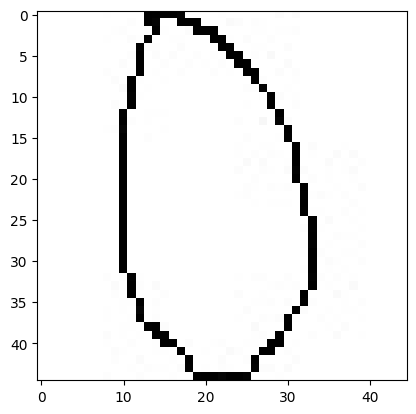

In [15]:
image_path = '{}/0/0001.jpg'.format(raw_dataset_path)

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Lỗi: Không thể đọc {image_path}")

print(img.shape)
plt.imshow(img, cmap='gray')


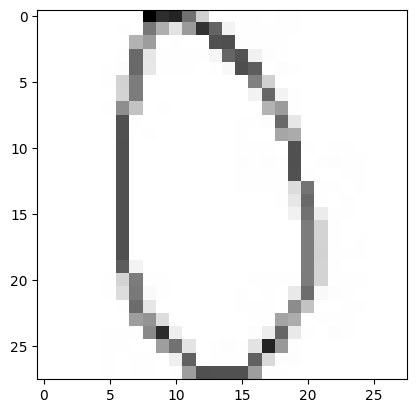

In [16]:
img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='gray')

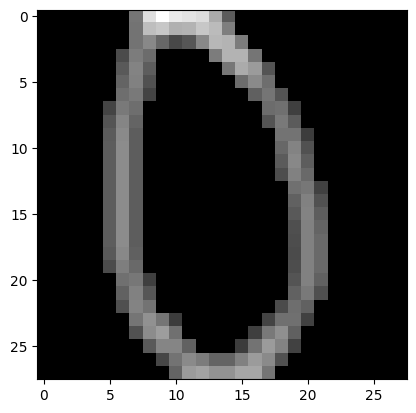

In [17]:
img = preprocess_image(image_path)
plt.imshow(img, cmap='gray')

## 3. Create dataset.csv

In [18]:
def create_dataset(dataset_path):
    # Check for existence
    if os.path.exists(dataset_path):
        shutil.rmtree(dataset_path)
    os.makedirs(dataset_path, exist_ok=True)

    # Create new dataset.csv
    filename = "dataset.csv"
    open('{}/{}'.format(dataset_path, filename), 'w').close()
    
    header = ["label"]
    for i in range(0, 784):
        header.append("pixel" + str(i))
    with open('{}/{}'.format(dataset_path, filename), 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)

    output_path = "{}/{}".format(dataset_path, filename)
    print("Dataset created at: {}".format(output_path))

    return output_path

dataset_folder_path = "../dataset"
dataset_path = create_dataset(dataset_path = dataset_folder_path)

Dataset created at: ../dataset/dataset.csv


In [19]:
def update_dataset( img, label_name, dataset_path):
    # Save img value
    data = [label_name]

    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            data.append(img[i, j])

    with open(dataset_path, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)

## 4. Save preprocessing dataset

In [20]:
# Create folder for processed dataset
def create_processed_dataset(folder_path , processed_folder_path):
    if os.path.exists(processed_folder_path):
        #delete folder
        shutil.rmtree(processed_folder_path)
    
    os.makedirs(processed_folder_path, exist_ok=True)
    print("Create a new folder name {}".format(processed_folder_path))

    for item in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, item)):
            os.mkdir(os.path.join(processed_folder_path, item))
    print("Add {} subfolders done.".format(len(os.listdir(processed_folder_path))))

In [21]:
processed_folder_path = "../processed_dataset"
folder_path = raw_dataset_path
create_processed_dataset(folder_path, processed_folder_path)

Create a new folder name ../processed_dataset
Add 15 subfolders done.


In [22]:
# Clean dataset then update to processed dataset
def clean_dataset(folder_path, processed_folder_path):
    for items in os.listdir(folder_path):
        for img in os.listdir(os.path.join(folder_path, items)):
            if img.endswith('.jpg'):
                img_path = os.path.join(folder_path, items, img)

                # Process image
                img = preprocess_image(image_path = img_path)
                file_path = os.path.join("{}/{}".format(processed_folder_path, items), os.path.basename(img_path))
                update_dataset(img, items, dataset_path= dataset_path)
                
                # Save processed image
                cv2.imwrite(file_path, img)

In [23]:
data = pd.read_csv(dataset_path)
data.shape
clean_dataset(folder_path, processed_folder_path)

## 5. Spit dataset to train and test

5.1 Load dataset

C:\Users\Acer\AppData\Local\Temp\ipykernel_11404\2003677390.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


0            0
1            0
2            0
3            0
4            0
         ...  
44995    times
44996    times
44997    times
44998    times
44999    times
Name: label, Length: 45000, dtype: object


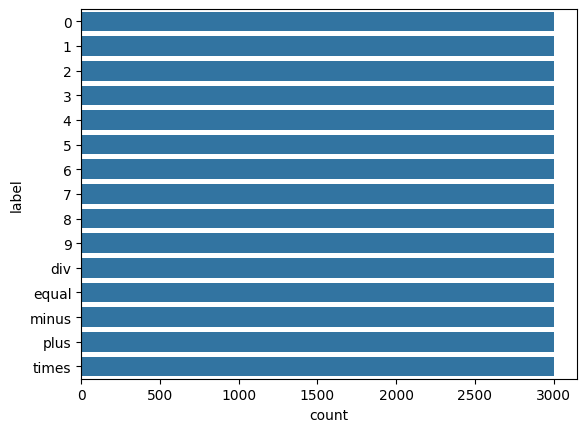

In [24]:
data = pd.read_csv(dataset_path)

print(data['label'])

g = sns.countplot(y = data['label'])

5.2 Split dataset.csv into train and test (.csv)

In [25]:
# Shuffle the dataset
data = shuffle(data)
print(data['label'])

# Split the dataset
train_df, test_df = train_test_split(data, test_size=0.2)

# Save the training and testing sets to separate CSV files
train_df.to_csv('{}/train.csv'.format(dataset_folder_path), index=False)
test_df.to_csv('{}/test.csv'.format(dataset_folder_path), index=False)

21951        7
16067        5
44176    times
1904         0
41617     plus
         ...  
20406        6
29148        9
25063        8
44605    times
19214        6
Name: label, Length: 45000, dtype: object


5.3 Load train and test (.csv)

In [26]:
train = pd.read_csv('{}/train.csv'.format(dataset_folder_path))
test = pd.read_csv('{}/test.csv'.format(dataset_folder_path))

# Checking
print("Dataset shape: {}".format(data.shape))
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))


Dataset shape: (45000, 785)
Train shape: (36000, 785)
Test shape: (9000, 785)
